Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:

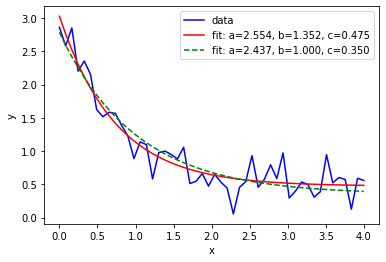

In [9]:
#Introduction to Curve Fitting

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# customizable function (exponential decay)
def func(x, a, b, c): 
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)

y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

plt.plot(xdata, ydata, 'b-', label='data')
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
popt2, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
plt.plot(xdata, func(xdata, *popt2), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

   Unnamed: 0    Id Province_State        Date  ConfirmedCases  Fatalities
0        4158  5779          Anhui  2020-01-22             1.0         0.0
1        4159  5780          Anhui  2020-01-23             9.0         0.0
2        4160  5781          Anhui  2020-01-24            15.0         0.0


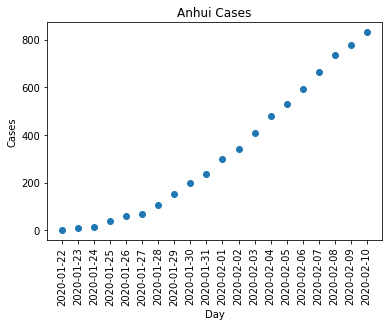

In [7]:
# Data Introduction
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('test_data.csv')
df_province = df.groupby('Province_State')
data = df_province.get_group('Anhui')
print(data.head(3))

counter = 20

data_start_pandemic = data[data['ConfirmedCases']>0]

plt.plot_date(data_start_pandemic['Date'][0:counter],data_start_pandemic['ConfirmedCases'][0:counter])
plt.xlabel('Day')
plt.xticks(data_start_pandemic['Date'][0:counter], rotation='vertical')
plt.ylabel('Cases')
plt.title('Anhui Cases')
plt.show()

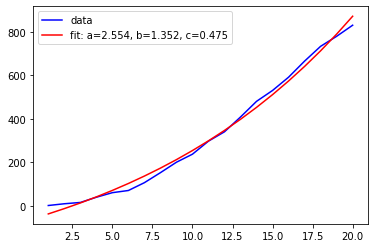

In [40]:
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

xdata = np.linspace(1, counter, counter)
ydata = data_start_pandemic['ConfirmedCases'][0:counter]

plt.plot(xdata, ydata, 'b-', label='data')
popt_, pcov_ = curve_fit(exp_func, xdata, ydata)
plt.plot(xdata, exp_func(xdata, *popt_), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.legend()
plt.show()

In [27]:
pcov_

array([[-5.29181054e+02, -1.49032241e-05,  5.29181038e+02,
        -7.03175708e-01],
       [-1.49032240e-05, -4.12575652e-13,  1.49032250e-05,
        -1.39582195e-06],
       [ 5.29181038e+02,  1.49032251e-05, -5.29181021e+02,
         7.02882144e-01],
       [-7.03194265e-01, -1.39582247e-06,  7.02900701e-01,
         2.18545520e+03]])

In [13]:
from sklearn.metrics import mean_squared_log_error

pcov_ #covariance_matrix
perr = np.sqrt(np.diag(pcov_)) #standard_deviation
print(perr/popt_) #CV 

start = 2
np.sqrt(mean_squared_log_error(ydata[start:], exp_func(xdata, *popt_)[start:]))

[ 0.21153348  0.11527039 -0.21019858]


0.12670919735833383

In [88]:
# np.linspace(1,counter/2,counter) : start,end,length

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [41]:
# RMSLE
exp_func(xdata, *popt_)[2:]
ydata[2:]

ydata[2:]+1
exp_func(xdata, *popt_)[1:]+1

np.log(exp_func(xdata, *popt_)[1:]+1)
np.log(ydata[2:]+1)

start = 2
test_log_val = (np.log(ydata[start:]+1)-np.log(exp_func(xdata, *popt_)[start:]+1))**2
test_log_val.sum()/len(test_log_val)

np.sqrt(test_log_val.sum()/len(test_log_val)) #RMSLE

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


0.12670919735833383